### 1. 예제파일

In [12]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()

In [13]:
print(type(c)) #가져온 데이터의 type을 확인
print(len(c))
print(c[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


### 2. tokenize(nltk 사용)

In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
c_sent = sent_tokenize(c)   # sentence 단위 tokenize
print(len(c_sent))
print(c_sent[:5])

357
['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.', '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SeongSan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
#word로 tokenize
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)   # word 단위 tokenize
print(len(c_words))
print(c_words[:5])

4640
['대한민국헌법', '유구한', '역사와', '전통에', '빛나는']


In [16]:
from konlpy.tag import Okt
okt = Okt()
tokens_c = okt.morphs(c) #형태소 단위로 tokenize

AttributeError: module 'tweepy' has no attribute 'StreamListener'

__konlpy.tag가 작동하지 않아 word-toknize된 c_words 사용__

In [18]:
import nltk
c_nltk_text = nltk.Text(c_words, name = "대한민국헌법") #tokens_c 대신 c_words(형태소x) 사용
c_nltk_text

<Text: 대한민국헌법>

In [20]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))
# 서로 다른 단어의 수
print(len(set(c_nltk_text.tokens)))

4640
2023


In [22]:
#단어와 단어의 빈도를 dictionary 형태로 표현 
c_nltk_text.vocab()

FreqDist({'.': 357, ',': 101, '수': 87, '①': 75, '또는': 70, '의하여': 66, '법률이': 57, '있다': 57, '한다': 56, '정하는': 50, ...})

In [25]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

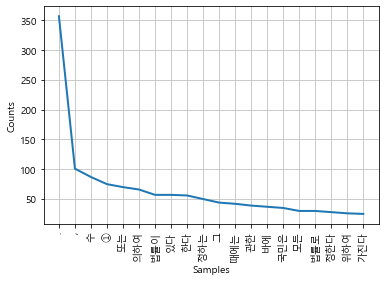

In [27]:
#상위 빈도 단어들의 빈도를 그래프로 출력
%matplotlib inline
c_nltk_text.plot(20)

In [30]:
tokens_new = []
for token in c_words:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip())
print(len(tokens_new))

3859


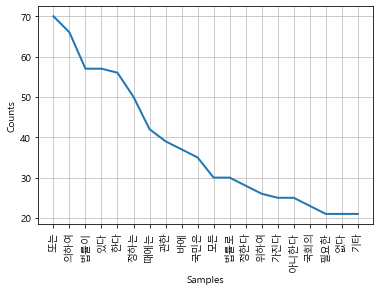

In [32]:
c_nltk_text = nltk.Text(tokens_new, name = "대한민국헌법")
c_nltk_text.plot(20)

In [34]:
#특정한 단어의 빈도를 알고 싶다면
c_nltk_text.count('대한민국')

1

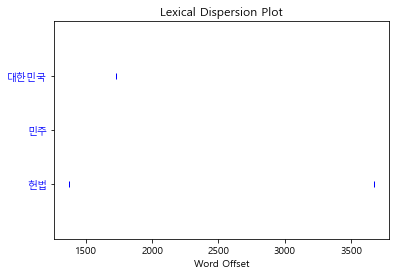

In [36]:
# 단어들 중 주어진 단어들의 위치를 표시
c_nltk_text.dispersion_plot(['대한민국', '민주', '헌법'])

### 3. Context(문맥정보 파악)

In [38]:
c_nltk_text.concordance('헌법')

Displaying 2 of 2 matches:
제48조 국회는 의장 1인과 부의장 2인을 선출한다 제49조 국회는 헌법 또는 법률에 특별한 규정이 없는 재적의원 과반수의 출석과 출석의원 
 헌법개정은 확정되며 대통령은 즉시 이를 공포하여야 한다 펼침 부칙 헌법 제10호 1987.10.29. 부칙보기 제1조 헌법은 1988년 2


In [40]:
c_nltk_text.similar('헌법')

상호원조 국무총리


In [42]:
nltk.download('stopwords')
# 함께 많이 나타난 단어들을 출력
c_nltk_text.collocations()

법률이 정하는; 법률로 정한다; 사항은 법률로; 권리를 가진다; 의하지 아니하고는; 필요한 사항은; 경우를 제외하고는; 규칙을
제정할; 대통령이 임명한다; 3분의 이상의; 찬성이 있어야; 자유를 가진다; 자문에 응하기; 국회의 동의를; 저촉되지
아니하는; 헌법에 의하여; 대통령의 자문에; 법률에 저촉되지; 임기는 6년으로; 아니하는 범위안에서


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SeongSan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4. English Word Cloud

In [3]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg   # Docs from project gutenberg.org
files_en = gutenberg.fileids()      # Get file ids
doc_en = gutenberg.open('austen-emma.txt').read()

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\SeongSan\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


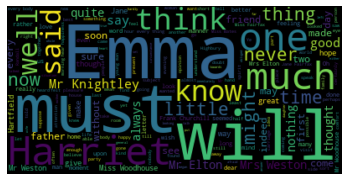

In [5]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(doc_en)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

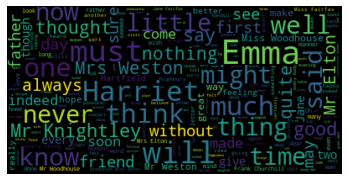

In [9]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(doc_en)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 5. 한글 Word Cloud

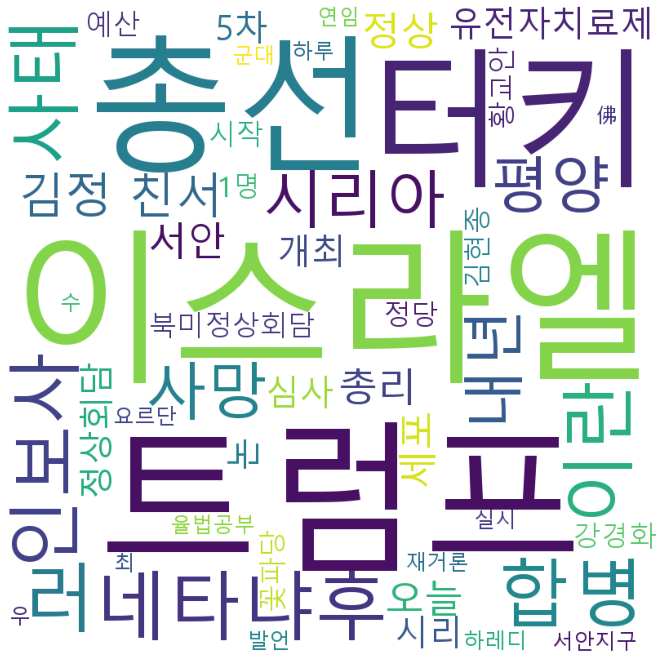

In [19]:
## text 파일로부터 읽어들여 워드클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
font_path = 'c:/Windows/Fonts/malgun.ttf' #한글 폰트의 위치를 지정
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
    max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

text=open('text.txt').read() #텍스트 파일을 읽음
wordcloud = wordcloud.generate(text) #워드 클라우드 생성
 
fig = plt.figure(figsize=(12,12)) #그림판 크기를 지정
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
## 다음 한글 기사 읽어오기
from collections import Counter
import random
import webbrowser

from konlpy.tag import Hannanum
import sys
from bs4 import BeautifulSoup
import urllib.request as req


def get_bill_text_daum():
    url1 = "http://media.daum.net" #URL 변경됨
    res = req.urlopen(url1)
    soup = BeautifulSoup(res, "html.parser")

    text2=soup.select("strong.tit_g > a.link_txt")
    kk=[a.string for a in text2]
    corpus = ''
    for text in kk:
        text = text.replace('\r','').replace('\n','').replace('\t','')
        corpus = corpus + ' ' +text
     
    return corpus

def get_tags(text, ntags=50, multiplier=10):
    h = Hannanum()
    nouns = h.nouns(text)
    count = Counter(nouns)
    return(nouns)
   
text = get_bill_text_daum()
tags = get_tags(text)
#print(tags)
#print(" ".join(tags))

### 워드클라우드 그리기
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
   # max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

wordcloud = wordcloud.generate(" ".join(tags)) #위에서 만든 tags를 이용하여 word cloud 생성
 
fig = plt.figure()
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear") #글자의 테두리를 매끄럽게... 위의 결과와 비교
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png') #이미지 파일로 저장

AttributeError: module 'tweepy' has no attribute 'StreamListener'

### 6. 외부 csv파일 특정 부분 Word Cloud

In [25]:
import pandas as pd
df = pd.read_csv('movie_data.csv', header=None, names=['review', 'rate', 'name'])
df.columns.tolist()
#".".join(df.review.tolist())

['review', 'rate', 'name']

In [27]:
df.head() #파일의 내용 미리보기 (상위 5개)

,review,rate,name
0,오~~ 종합선물셋트,9,인피니티 워
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...,10,인피니티 워
2,이제 남은건타노스 밖에,10,인피니티 워
3,타노스는 발암물질이다.,9,인피니티 워
4,정말재미있게봤습니다,10,인피니티 워


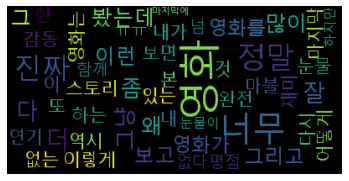

In [28]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 50,
    #width = 800,
    #height = 800, 
    #background_color='white',
    max_words=50
)

wordcloud = wordcloud.generate(" ".join(df.review.tolist())) #review column의 내용을 가져와서 word cloud 그리기
 
fig = plt.figure()
#fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')